✅ Loaded data shape: (4992, 36406)


C:\Users\abuhu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\scanpy\preprocessing\_scale.py:309: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)
C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.11_3.11.2544.0_x64__qbz5n2kfra8p0\Lib\functools.py:909: UserWarning: zero-centering a sparse array/matrix densifies it.
  return dispatch(args[0].__class__)(*args, **kw)
C:\Users\abuhu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
C:\Users\abuhu\AppData\Local\Temp\ipykernel_33652\2588709480.py:22: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

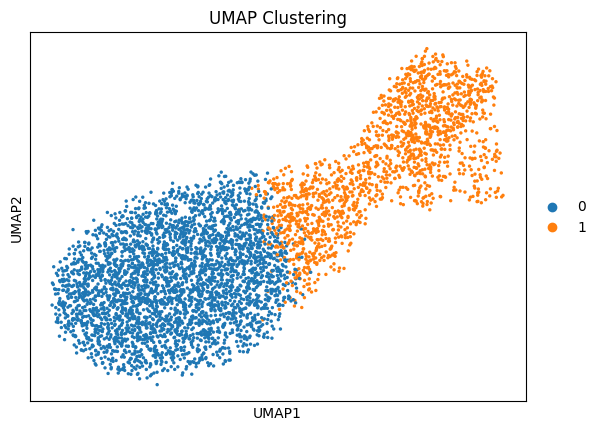

C:\Users\abuhu\AppData\Local\Temp\ipykernel_33652\2588709480.py:33: FutureWarning: Use `squidpy.pl.spatial_scatter` instead.
  sc.pl.spatial(


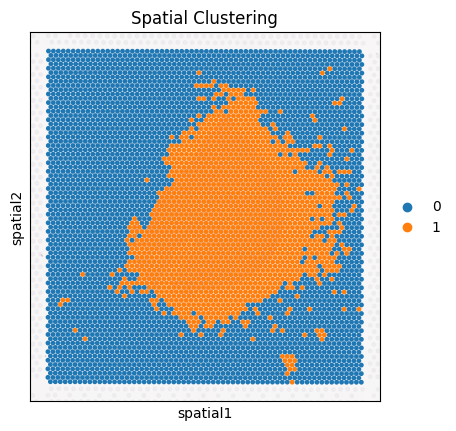

✅ Saved: kidney_clustered_output.h5ad


In [1]:
import scanpy as sc
import numpy as np
import matplotlib.pyplot as plt

# ✅ STEP 1: Load dataset
adata = sc.read_h5ad("6800STDY12499407.h5ad")
print(f"✅ Loaded data shape: {adata.shape}")

# ✅ STEP 2: Normalize and scale
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)
sc.pp.highly_variable_genes(adata, flavor="seurat", n_top_genes=2000)
adata = adata[:, adata.var.highly_variable]
sc.pp.scale(adata, max_value=10)

# ✅ STEP 3: PCA and neighbors
sc.tl.pca(adata, svd_solver="arpack")
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=30)

# ✅ STEP 4: UMAP and clustering
sc.tl.umap(adata)
sc.tl.leiden(adata, resolution=0.4)

# ✅ STEP 5: Plot UMAP
sc.pl.umap(adata, color="leiden", title="UMAP Clustering")

# ✅ STEP 6: Spatial clustering (correct library ID format)
library_id = "spaceranger130_count_44214_6800STDY12499407_GRCh38-2020-A"

try:
    if "spatial" in adata.uns and library_id in adata.uns["spatial"]:
        if "hires" in adata.uns["spatial"][library_id]["images"]:
            sc.pl.spatial(
                adata,
                img_key="hires",
                color="leiden",
                library_id=library_id,
                title="Spatial Clustering",
                cmap="magma",
                size=1.5,
                alpha_img=0.3,
            )
        else:
            raise KeyError("No 'hires' image available.")
    else:
        raise KeyError("Specified library ID not found.")
except Exception as e:
    print("⚠️ Spatial image plot failed:", e)
    print("👉 Plotting spatial coordinates without image...")
    sc.pl.spatial(
        adata,
        color="leiden",
        title="Spatial Clustering (Coordinates Only)",
        spot_size=1.2
    )

# ✅ STEP 7: Save result
adata.write("kidney_clustered_output.h5ad")
print("✅ Saved: kidney_clustered_output.h5ad")
